### Disclaimer

Code initially was created as answer to assigned in a course from the University of Oslo. Parts that are my own are indicated accordingly.

# Binary Classifiers, Logistic and Linear Regression and Multi Class Tasks

## Imports, Data Preperation, Code Snippets

#### Code Is Not My Own

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn #for datasets

#custom imports
from operator import itemgetter #itemgetter for advances list sorting
import pandas as pd #pandas for better tables
import math #math for logarithm operations

In [ ]:
from sklearn.datasets import make_blobs
X, t = make_blobs(n_samples=[400,400,400, 400, 400], centers=[[0,1],[4,1],[8,1],[2,0],[6,0]],
                  n_features=2, random_state=2019, cluster_std=1.0)

In [ ]:
X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_train = t[indices[:1000]]
t_val = t[indices[1000:1500]]
t_test = t[indices[1500:]]

In [ ]:
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2022)
rng.shuffle(indices)
indices[:10]

### Preperation of Data, Plotting Function

(No changes compared to original. Partly markdown has been deleted to make space.)

In [ ]:
t2_train = t_train >= 3
t2_train = t2_train.astype('int')
t2_val = (t_val >= 3).astype('int')
t2_test = (t_test >= 3).astype('int')

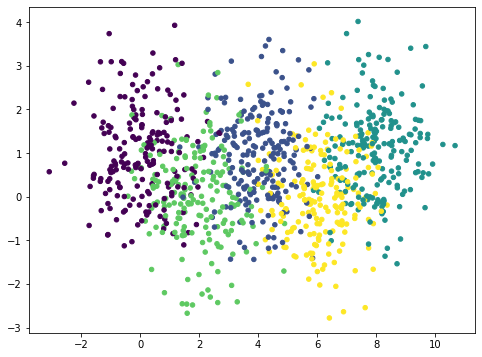

In [ ]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_train, s=20.0)
plt.show()

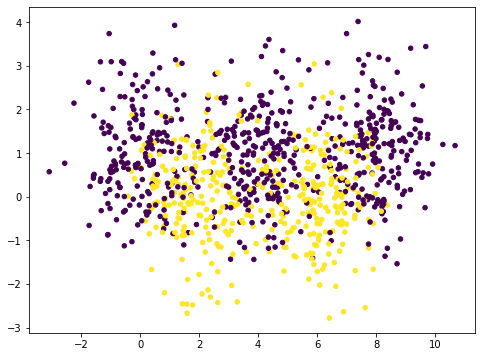

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=20.0)
plt.show()

In [ ]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=20.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

## Binary classifiers

#### Code Is My Own

In [ ]:
# premade function to add bias
def add_bias(X):

    # Put bias in position 0
    sh = X.shape
    if len(sh) == 1:

        #X is a vector
        return np.concatenate([np.array([1]), X])
    else:

        # X is a matrix
        m = sh[0]
        bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
        return np.concatenate([bias, X], axis  = 1)

In [ ]:
# premade base numpy classifier method
class NumpyClassifier():
    """Common methods to all numpy classifiers --- if any"""
    def accuracy(self,X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)

        if len(pred.shape) > 1:
            pred = pred[:,0]
        return np.sum(pred==y_test)/len(pred)

In [ ]:
# premade standart classifier method for linear regression
class NumpyLinRegClass(NumpyClassifier):

    def fit(self, X_train, t_train, eta, epochs):


        (k, m) = X_train.shape
        X_train = add_bias(X_train)

        self.weights = weights = np.zeros(m+1)

        # training weights for a number of epochs
        for e in range(epochs):
            weights -= eta / k *  X_train.T @ (X_train @ weights - t_train)

    # prediction method
    def predict(self, x, threshold=0.1):
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

In [ ]:
def testingRuns(run_data):
    result = []

    for run in run_data:
        cl = NumpyLinRegClass()
        cl.fit(X_train, t2_train, run[0], run[1])

        run_result = [run[0],run[1], cl.accuracy(X_val, t2_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(2), reverse=True)
    result = pd.DataFrame(result)
    result.columns = ["eta", "epochs", "accuracy"]

    print("Testing different parameters to find the the highest accuracy.\nList in table from best to worst accuracy.")
    return result

testingRuns([[0.1, 500], [0.1, 1000], [0.1, 2000], [0.001, 500], [0.001, 1000], [0.001, 2000], [1e-05, 500], [1e-05, 1000], [1e-05, 2000], [1e-08, 500], [1e-08, 1000], [1e-08, 2000]])

Testing different parameters to find the the highest accuracy.
List in table from best to worst accuracy.


<ipython-input-13-8b7a3fd9e2ea>:14: RuntimeWarning: overflow encountered in matmul
  weights -= eta / k *  X_train.T @ (X_train @ weights - t_train)
<ipython-input-13-8b7a3fd9e2ea>:14: RuntimeWarning: invalid value encountered in matmul
  weights -= eta / k *  X_train.T @ (X_train @ weights - t_train)


,eta,epochs,accuracy
0,1.000000e-03,500,0.586
1,1.000000e-03,1000,0.578
2,1.000000e-01,2000,0.572
3,1.000000e-05,500,0.572
4,1.000000e-08,500,0.572
5,1.000000e-08,1000,0.572
6,1.000000e-08,2000,0.572
7,1.000000e-03,2000,0.562
8,1.000000e-05,2000,0.524
9,1.000000e-01,500,0.484


Plotting the best results with 0.001 eta and 500 epochs. The accuracy is 0.586


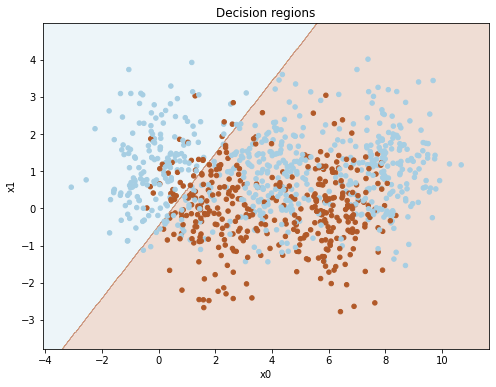

In [ ]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, 0.001, 500)

print("Plotting the best results with 0.001 eta and 500 epochs. The accuracy is "+ str(cl.accuracy(X_val, t2_val)))
plot_decision_regions(X_train, t2_train, cl)

### Loss

In [ ]:
class NumpyLinRegClass_Loss(NumpyClassifier):

    # adding loss_list to classifier
    loss_list =[]

    def fit(self, X_train, t_train, eta, epochs):

        # initalizing weights, params and bias
        (k, m) = X_train.shape
        X_train_bias = add_bias(X_train)
        self.weights = weights = np.zeros(m+1)

        # initalizing list of losses for each epoch
        self.loss_list=[]

        for e in range(epochs):
            weights -= eta / k * X_train_bias.T @ (X_train_bias @ weights - t_train)

            # calculating loss for epoch and adding it to list of all epochs
            loss = mse(t_train, self.predict(X_train))
            self.loss_list.append(loss)


    def predict(self, x, threshold=0.1):
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

# copied mse function from previous exercise
def mse(y, y_pred):
    sum_errors = 0

    for i in range(len(y)):
        sum_errors += (y[i] - y_pred[i])**2

    mean_squared_error = sum_errors/len(y)
    return mean_squared_error

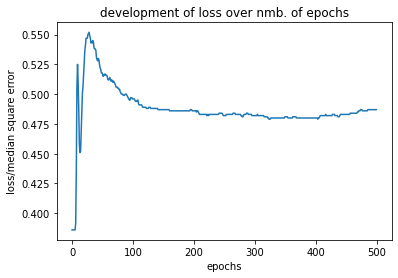

,loss
epoch,
0,0.386
1,0.386
2,0.386
3,0.386
4,0.386
...,...
495,0.487
496,0.487
497,0.487


In [ ]:
def testingLoss(eta, epochs):

    cl = NumpyLinRegClass_Loss()
    cl.fit(X_train, t2_train,eta, epochs)

    #plotting loss of best run
    x = range(epochs)

    # adding points for different population sizes
    plt.plot(x, cl.loss_list)

    # addding title, subtitle
    plt.title("development of loss over nmb. of epochs")

    # adding legend, x and y-label tags
    plt.xlabel("epochs")
    plt.ylabel("loss/median square error")
    plt.show()

    result = pd.DataFrame(cl.loss_list)
    result.columns=["loss"]
    result.index.name="epoch"

    return result

testingLoss(0.001, 500)

### Control training
#### Code Is My Own

In [ ]:
class NumpyLinRegClass_Ctrl(NumpyClassifier):

    # adding loss_list to classifier
    loss_list =[]
    accuracy_list=[]
    epochs = 0

    def fit(self, X_train, t_train, eta, max_epochs, loss_diff, X_val="", t_val=""):

        # initalizing weights, params and bias
        (k, m) = X_train.shape
        X_train_bias = add_bias(X_train)
        self.weights = weights = np.zeros(m+1)

        # initalizing list of losses for each epoch
        self.loss_list=[]
        self.accuracy_list=[]
        self.epochs = 0
        validation = False

        if isinstance(X_val, str)==False:

            validation = True
            v_loss_list = []
            v_accuracy_list = []

        for e in range(max_epochs):
            weights -= eta / k * X_train_bias.T @ (X_train_bias @ weights - t_train)

            # calculating loss for epoch
            t_loss = mse(t_train, self.predict(X_train))

            if validation:
                v_loss = mse(t_val, self.predict(X_val))
                self.loss_list.append(t_loss)
                v_loss_list.append(v_loss)

                self.accuracy_list.append(self.accuracy(X_train, t2_train))
                v_accuracy_list.append(self.accuracy(X_val, t_val))

            elif validation == False:
                self.loss_list.append(t_loss)
                self.accuracy_list.append(self.accuracy(X_train, t_train))

            #check every epoch after the first 25% if loss has changed less then loss_diff
            if self.epochs >= max_epochs*0.25:
                if self.loss_list[self.epochs-1] - self.loss_list[self.epochs] < loss_diff:
                    self.epochs += 1
                    break

            self.epochs += 1

        if validation == True:
            self.loss_list = [self.loss_list, v_loss_list]
            self.accuracy_list = [self.accuracy_list, v_accuracy_list]


    def predict(self, x, threshold=0.1):
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

# copied mse function from previous exercise
def mse(train, prediction):
    sum_errors = 0

    for i in range(len(train)):
        sum_errors += (train[i] - prediction[i]) ** 2

    mean_squared_error = sum_errors/len(train)
    return mean_squared_error

In [ ]:
def testingCtrlRuns(loss_data):

    for loss in loss_data:

        cl = NumpyLinRegClass_Ctrl()
        cl.fit(X_train, t2_train,0.001,500,loss, X_val, t2_val)
        print("eta:  0.001, max. epochs: 1000, epochs: "+ str(cl.epochs)+", loss diff: "+ str(loss)+", accuracy: "+str(cl.accuracy(X_test, t2_test)))

testingCtrlRuns([1e-5, 1e-08, 1e-20])

eta:  0.001, max. epochs: 1000, epochs: 126, loss diff: 1e-05, accuracy: 0.536
eta:  0.001, max. epochs: 1000, epochs: 126, loss diff: 1e-08, accuracy: 0.536
eta:  0.001, max. epochs: 1000, epochs: 126, loss diff: 1e-20, accuracy: 0.536


### Comment:
We can see that the difference has to be set very low, otherwise the run stops really soon. Usually it would stop even sooner, in this case it's waiting the first 25% of the maximum runs before it first compares to the given max. loss difference.

Still, the accuracy is not as good as with the full 500 epochs, which is interesting. Although we also can see in the earlier numbers that the difference between loss from one to the other epochs are really small over most of the time.

**There is a clear difference between the accuracy calculated after training (like above) and the accuarcy calculated after each epoch (like below). I cannot explain that to myself at would guess there is an error somewhere.**

Plotting development of loss and accuracy over nmb. of epochs



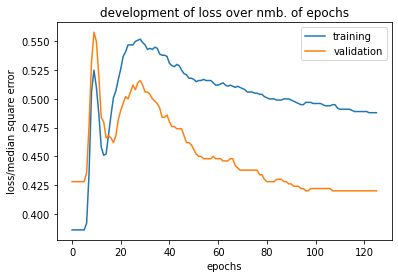

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
training loss,0.386,0.386,0.386,0.386,0.386,0.386,0.392,0.436,0.506,0.525,...,0.489,0.489,0.489,0.489,0.489,0.489,0.488,0.488,0.488,0.488
validation loss,0.428,0.428,0.428,0.428,0.428,0.428,0.436,0.478,0.532,0.558,...,0.420,0.420,0.420,0.420,0.420,0.420,0.420,0.420,0.420,0.420


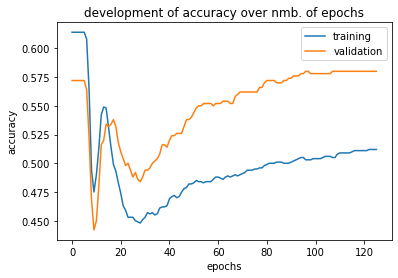

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
training accuracy,0.614,0.614,0.614,0.614,0.614,0.614,0.608,0.564,0.494,0.475,...,0.511,0.511,0.511,0.511,0.511,0.511,0.512,0.512,0.512,0.512
validation accuracy,0.572,0.572,0.572,0.572,0.572,0.572,0.564,0.522,0.468,0.442,...,0.580,0.580,0.580,0.580,0.580,0.580,0.580,0.580,0.580,0.580


In [ ]:
def testingCtrl(eta, epochs, loss_diff):
    print("Plotting development of loss and accuracy over nmb. of epochs\n")

    cl = NumpyLinRegClass_Ctrl()
    cl.fit(X_train, t2_train,eta,epochs,loss_diff, X_val, t2_val)

    #creating values for x-axis
    x = range(cl.epochs)

    # adding points for different population sizes
    plt.plot(x, cl.loss_list[0], label="training")
    plt.plot(x, cl.loss_list[1], label="validation")

    # addding title, subtitle
    plt.title("development of loss over nmb. of epochs")

    # adding legend, x and y-label tags
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss/median square error")
    plt.show()

    result_loss = pd.DataFrame([cl.loss_list[0],cl.loss_list[1]])
    result_loss.columns=range(cl.epochs)
    result_loss.index=["training loss", "validation loss"]
    display(result_loss)

    # adding points for different population sizes
    plt.plot(x, cl.accuracy_list[0], label="training")
    plt.plot(x, cl.accuracy_list[1], label="validation")

    # addding title, subtitle
    plt.title("development of accuracy over nmb. of epochs")

    # adding legend, x and y-label tags
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

    result_ac = pd.DataFrame([cl.accuracy_list[0],cl.accuracy_list[1]])
    result_ac.columns=range(cl.epochs)
    result_ac.index=["training accuracy", "validation accuracy"]
    display(result_ac)


testingCtrl(0.001, 500, 0.0001)

### Logistic regression
### Code Is My Own

In [ ]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [ ]:
class NumpyLogReg(NumpyClassifier):

    # adding loss list and accuracy list to classifier
    loss_list =[]
    accuracy_list=[]
    epochs = 0

    def fit(self, X_train, t_train, eta,max_epochs,loss_diff, X_val="", t_val=""):

        # initalizing weights, params and bias
        (k, m) = X_train.shape
        X_train_bias = add_bias(X_train)
        self.weights = weights = np.zeros(m+1)

        # initalizing list of losses for each epoch
        self.loss_list = []
        self.accuracy_list = []
        self.epochs = 0
        validation = False

        if isinstance(X_val, str)==False:

            validation = True
            v_loss_list = []
            v_accuracy_list = []

        for e in range(max_epochs):
            weights -= eta / k *  X_train_bias.T @ (self.forward(X_train_bias) - t_train)

            # calculating loss for epoch
            prediction = self.predict(X_train)
            t_loss = self.logLoss(t_train, prediction)

            if validation:
                v_loss = mse(t_val, self.predict(X_val))
                self.loss_list.append(t_loss)
                v_loss_list.append(v_loss)

                self.accuracy_list.append(self.accuracy(X_train, t_train))
                v_accuracy_list.append(self.accuracy(X_val, t_val))

            elif validation == False:
                self.loss_list.append(t_loss)
                self.accuracy_list.append(self.accuracy(X_train, t_train))

            #check every epoch after the first 25% if loss has changed less then loss_diff
            if self.epochs >= max_epochs*0.25 and self.loss_list.__len__()>1 :

                if (self.loss_list[self.epochs-1] - self.loss_list[self.epochs]) < loss_diff:
                    self.epochs += 1
                    break

            self.epochs += 1

        if validation:
            self.loss_list = [self.loss_list, v_loss_list]
            self.accuracy_list = [self.accuracy_list, v_accuracy_list]

    def forward(self, X):
        return logistic(X @ self.weights)

    def score(self, X):
        z = add_bias(X)
        score = self.forward(z)
        return score

    def predict(self, X, threshold=0.5):
        z = add_bias(X)
        score = self.forward(z)
        return (score>threshold).astype('int')

    # parlty copied from previous exercise, follows -(ylog(p)+(1-y)log(1-p)) equation for logistic loss
    def logLoss(self, y, p):
        for i in range(len(y)):

            # initalizing loss variable
            loss = 0

            # calculating loss and subtracting from value ("adding up losses")
            loss -= y[i] * math.log1p(p[i]) + (1 - y[i]) * math.log1p(1 - p[i])

        # returning loss over all values
        return loss/len(y)

In [ ]:
def testLogReg(run_data):

    result = []

    for run in run_data:
        cl = NumpyLogReg()
        cl.fit(X_train, t2_train, run[0], run[1], 1)

        run_result = [run[0],run[1], cl.accuracy(X_val, t2_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(2), reverse=True)
    result = pd.DataFrame(result)
    result.columns = ["eta", "epochs", "accuracy"]

    print("Testing different parameters to find the the highest accuracy.\nList in table from best to worst accuracy.\n")
    return result


testLogReg([[0.1, 500], [0.1, 1500],[0.1, 3000], [0.001, 500], [0.001, 1500], [0.001, 3000], [0.2, 500], [0.02, 1500], [0.2, 3000], [0.5, 500], [0.5, 1500], [0.5, 3000]])

Testing different parameters to find the the highest accuracy.
List in table from best to worst accuracy.



,eta,epochs,accuracy
0,0.100,1500,0.672
1,0.100,3000,0.672
2,0.200,3000,0.672
3,0.200,500,0.668
4,0.100,500,0.662
5,0.020,1500,0.660
6,0.500,3000,0.630
7,0.500,500,0.620
8,0.500,1500,0.620
9,0.001,3000,0.586


In [ ]:
def testLogReg_Loss(loss_data):

    result = []

    for loss_diff in loss_data:
        cl = NumpyLogReg()
        cl.fit(X_train, t2_train, 0.1, 1500, loss_diff)

        run_result = [0.1,1500,cl.epochs,loss_diff,cl.accuracy(X_val, t2_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(4), reverse=True)
    result = pd.DataFrame(result)
    result.columns = ["eta", "max. epochs","epochs","loss diff", "accuracy"]

    print("Testing different loss_diff to find the the highest accuracy.\nList in table from best to worst accuracy.")
    return result

testLogReg_Loss([1e-5, 1e-08, 1e-20])

Testing different loss_diff to find the the highest accuracy.
List in table from best to worst accuracy.


,eta,max. epochs,epochs,loss diff,accuracy
0,0.1,1500,376,1.000000e-05,0.672
1,0.1,1500,376,1.000000e-08,0.672
2,0.1,1500,376,1.000000e-20,0.672


Plotting the best results with 0.1 eta and 1500 epochs. The accuracy is 0.672


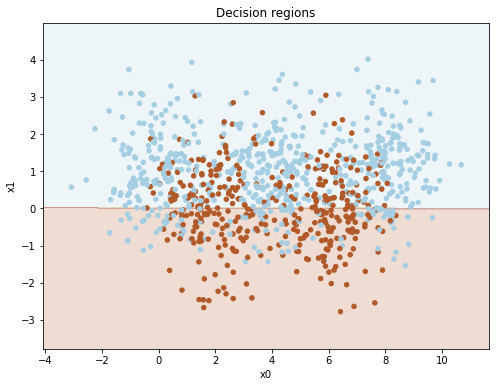

In [ ]:
cl = NumpyLogReg()
cl.fit(X_train, t2_train, 0.1, 1500, 1e-05)

print("Plotting the best results with 0.1 eta and 1500 epochs. The accuracy is "+ str(cl.accuracy(X_val, t2_val)))
plot_decision_regions(X_train, t2_train, cl)

Plotting development of loss and accuracy over nmb. of epochs



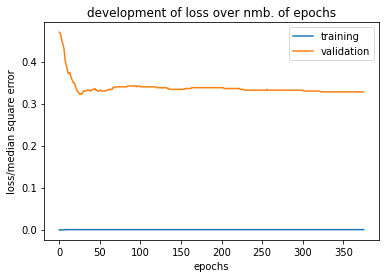

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
training loss,-0.000693,-0.000693,-0.000693,-0.000693,-0.000693,-0.000693,-0.000693,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
validation loss,0.470000,0.468000,0.462000,0.452000,0.444000,0.438000,0.428000,0.406,0.396,0.388,...,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328


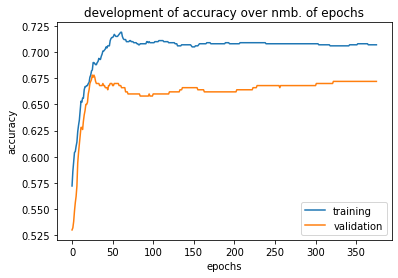

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
training accuracy,0.572,0.586,0.595,0.604,0.605,0.610,0.614,0.624,0.630,0.635,...,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707
validation accuracy,0.530,0.532,0.538,0.548,0.556,0.562,0.572,0.594,0.604,0.612,...,0.672,0.672,0.672,0.672,0.672,0.672,0.672,0.672,0.672,0.672


In [ ]:
def testingLog(eta, max_epochs, loss_diff):
    print("Plotting development of loss and accuracy over nmb. of epochs\n")

    cl = NumpyLogReg()
    cl.fit(X_train, t2_train, 0.1, 1500,1e-05, X_val, t2_val)

    #creating values for x-axis
    x = range(cl.epochs)

    # adding points for different population sizes
    plt.plot(x, cl.loss_list[0], label="training")
    plt.plot(x, cl.loss_list[1], label="validation")

    # addding title, subtitle
    plt.title("development of loss over nmb. of epochs")

    # adding legend, x and y-label tags
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss/median square error")
    plt.show()

    result_loss = pd.DataFrame([cl.loss_list[0],cl.loss_list[1]])
    result_loss.columns=range(cl.epochs)
    result_loss.index=["training loss", "validation loss"]
    display(result_loss)

    # adding points for different population sizes
    plt.plot(x, cl.accuracy_list[0], label="training")
    plt.plot(x, cl.accuracy_list[1], label="validation")

    # addding title, subtitle
    plt.title("development of accuracy over nmb. of epochs")

    # adding legend, x and y-label tags
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

    result_ac = pd.DataFrame([cl.accuracy_list[0],cl.accuracy_list[1]])
    result_ac.columns=range(cl.epochs)
    result_ac.index=["training accuracy", "validation accuracy"]
    display(result_ac)


testingLog(0.1, 1500,1e-05)

## Multi-class classifiers

### "One-vs-rest" with logistic regression
#### Code Is Partly My Own

In [ ]:
# copy of code from week 7 (used to be above)
class OneVsRest_NumpyLogReg(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""

        (k, m) = X_train.shape
        X_train = add_bias(X_train)

        self.weights = weights = np.zeros(m+1)

        for e in range(epochs):
            weights -= eta / k *  X_train.T @ (self.forward(X_train) - t_train)

    def forward(self, X):
        return logistic(X @ self.weights)

    def score(self, x):
        z = add_bias(x)
        score = self.forward(z)
        return score

    def predict(self, x, threshold=0.5):
        z = add_bias(x)
        score = self.forward(z)
        return (score>threshold).astype('int')

In [ ]:
# newly created class for one vs. all classifier
class OneVsRest_Multi(NumpyClassifier):

    # initalizing high lvl variables
    splits = 0
    data_set = []
    class_set = []

    def fit(self, X_train, t_train, eta, epochs, splits):

        # initalizing splits and cleaning out data_set, class_set
        self.splits = splits
        self.data_set = []
        self.class_set = []

        # creating specific data sets for each class ("split")
        for split in range(self.splits):

            # creating data sets for each different class
            self.data_set.append((t_train == split).astype('int'))

            # training x different classifiers
            self.class_set.append(OneVsRest_NumpyLogReg())
            self.class_set[split].fit(X_train, self.data_set[split], eta, epochs)

    # special prediciton
    def predict(self, X_val):

        # initalizing output and tmp list
        prediction = []
        tmp_scores = []

        # extracting scores for all x classifiers, transforming intp numpy array
        for split in range(self.splits):
            tmp_scores.append(self.class_set[split].score(X_val))
        scores = np.array(tmp_scores)

        # get score for each single datapoint in X_val
        for i in range(0,len(X_val)):
            iscores = []

            # extracting scores for different classes, temporaly storing them in iscores
            for split in range(self.splits):
                iscores.append(scores[split][i])

            # finding highes score and adding it to prediction
            prediction.append(np.argmax(iscores))

        return np.array(prediction)

Running Classifier with different etas, epochs. Printing out table sorted by accuracy.
Plotting the best results with 0.2 eta, 3000 epochs and 5 classes. The accuracy is 0.754



,eta,epochs,accuracy
0,0.200,3000,0.754
1,0.200,1500,0.748
2,0.100,3000,0.748
3,0.100,1500,0.734
4,0.500,3000,0.728
5,0.500,1500,0.724
6,0.200,500,0.724
7,0.100,500,0.708
8,0.500,500,0.696
9,0.001,3000,0.394


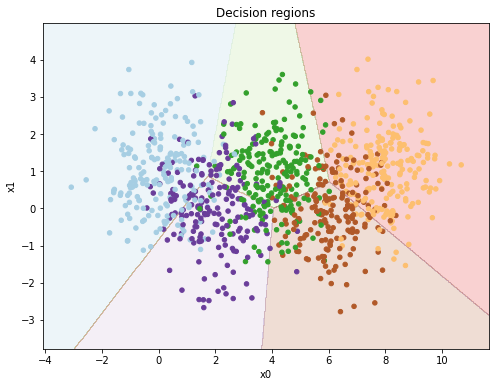

In [ ]:
def test_OneVsRest(test_data):
    result = []
    classes = 5

    print("Running Classifier with different etas, epochs. Printing out table sorted by accuracy.")

    for data in test_data:
        cl = OneVsRest_Multi()
        cl.fit(X_train, t_train, data[0], data[1], classes)

        run_result = [data[0],data[1], cl.accuracy(X_val, t_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(2), reverse=True)

    cl = OneVsRest_Multi()
    cl.fit(X_train, t_train, result[0][0], result[0][1], classes)

    print("Plotting the best results with "+str(result[0][0])+ " eta, "+str(result[0][1])+" epochs and "+str(classes)+" classes. The accuracy is "+ str(cl.accuracy(X_val, t_val))+"\n")
    plot_decision_regions(X_train, t_train, cl)

    result = pd.DataFrame(result)
    result.columns = ["eta", "epochs", "accuracy"]

    return result

test_OneVsRest([[0.5, 500], [0.5, 1500], [0.5, 3000],[0.2, 500], [0.2, 1500], [0.2, 3000],[0.1, 500], [0.1, 1500], [0.1, 3000], [0.001, 500], [0.001, 1500], [0.001, 3000]])


Top: Plotting the results with 0.2, eta 3000 epochs and 3 classes. The accuracy is 0.55

Bottom: Plotting the results with 0.2 eta, 3000 epochs and 10 classes. The accuracy is 0.754



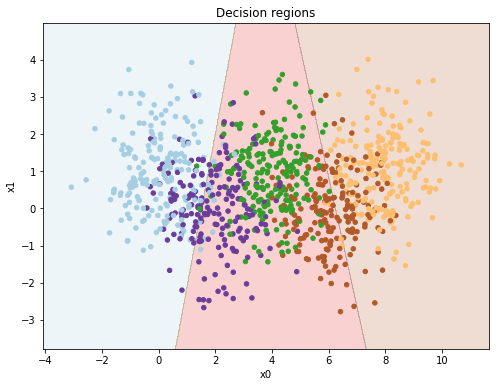

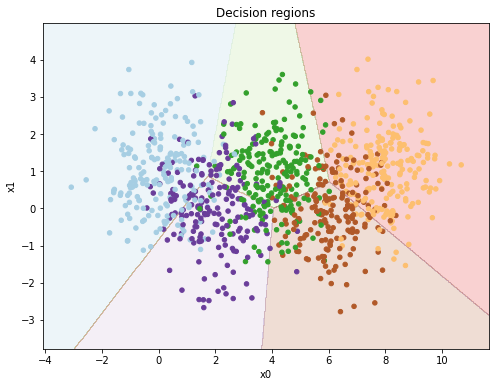

In [ ]:
    cl = OneVsRest_Multi()
    cl.fit(X_train, t_train, 0.2, 3000, 3)

    print("Top: Plotting the results with 0.2, eta 3000 epochs and 3 classes. The accuracy is "+ str(cl.accuracy(X_val, t_val))+"\n")
    plot_decision_regions(X_train, t_train, cl)

    cl = OneVsRest_Multi()
    cl.fit(X_train, t_train, 0.2, 3000, 10)

    print("Bottom: Plotting the results with 0.2 eta, 3000 epochs and 10 classes. The accuracy is "+ str(cl.accuracy(X_val, t_val))+"\n")
    plot_decision_regions(X_train, t_train, cl)

# Part II
## Multi-layer neural networks

### multi layer neural network
#### Code Is My Own

In [ ]:
class MNNClassifier():

    def __init__(self, eta, dim_hidden):

        # initalizing eta, hidden dimensions
        self.eta = eta
        self.dim_hidden = dim_hidden

        # initalizing weights
        self.weights1 = 0
        self.weights2 = 0

        # initalizing dimensions
        self.dim_in = 0
        self.dim_out = 0

    def fit(self, x, t, epochs):
        # scaling X data with Scaler class
        x = Scaler().normalize(x)

        #updating dim_in, dim_out from X and t data with DimCalculator class
        self.dim_in = DimCalculator().dim_in(x)
        self.dim_out = DimCalculator().dim_out(t)

        # encoding data with Encoder Class
        t_encoded = Encoder().code(t)

        # inizialize weights with Weighter class
        self.weights1 = WeightCreater().weights_in(dim_in, dim_hidden)
        self.weights2 = WeightCreater().weights_out(dim_out, dim_hidden)

        for epoch in range(epochs):

            #calling forward
            forward_output = self.forward(x)

            # backward
            # getting out_delta
            output_delta = (forward_output[1] - t_encoded) * forward_output[1] * (1 - forward_output[1])

            #getting hidden layer delta
            hidden_ly_delta = (output_delta @ self.weights2.T)[:, 1:] * forward_output[0] * (1 - forward_output[0])

            #updating both weights
            self.weights2 -= self.eta * AddingBias().negative(forward_output[0]).T @ output_delta
            self.weights1 -= self.eta * AddingBias().negative(X_train).T @ hidden_ly_delta

    def forward(self, x):

        # adding bias to X data
        biased_x = AddingBias().negative(x)

        # creating hidden layer (output1) and final layer result (output2)
        output1 = logistic(biased_x @ self.weights1)
        output2 = logistic(AddingBias().negative(output1) @ self.weights2)

        return [output1, output2]

    # mostly copied from logistic regression function above
    def predict(self, x):
        hidden_output, output = self.forward(x)
        return np.argmax(output, axis=1)

    # mostly copied from above, only added scaling to X set
    def accuracy(self, x, t):
        x_scaled = Scaler().normalize(x)
        prediction = self.predict(x_scaled)

        return np.sum(prediction == t) / len(prediction)

### Multi-class

In [ ]:
def MNNTestRun(test_data):

    print("Testing different parameters to find the the highest accuracy.\nList in table from best to worst accuracy.\n")
    result = []

    for test in test_data:
        mnncl = MNNClassifier(test[0], test[2])
        mnncl.fit(X_train, t_train, test[1])

        run_result = [test[0], test[1],test[2],mnncl.accuracy(X_val, t_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(3), reverse=True)
    result = pd.DataFrame(result)
    result.columns = ["eta", "epochs","hidden nodes", "accuracy"]

    return result

MNNTestRun([[0.1, 1500, 6], [0.2, 1500, 6], [0.2, 3000, 6],[0.2, 1500, 7], [0.2, 1500, 9], [0.2, 1500, 12],
            [0.1, 500, 6], [0.1, 1500, 6], [0.1, 3000, 6],[0.1, 1500, 7], [0.1, 1500, 9], [0.1, 1500, 12],
            [0.01, 500, 6], [0.01, 1500, 6], [0.01, 3000, 6],[0.01, 1500, 7], [0.01, 1500, 9], [0.01, 1500, 12]])

Testing different parameters to find the the highest accuracy.
List in table from best to worst accuracy.



KeyboardInterrupt: KeyboardInterrupt: 

Bottom: Plotting the results with 0.2 eta, 3000 epochs and hidden classes. The accuracy is 0.754



<ipython-input-21-cb4573539302>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


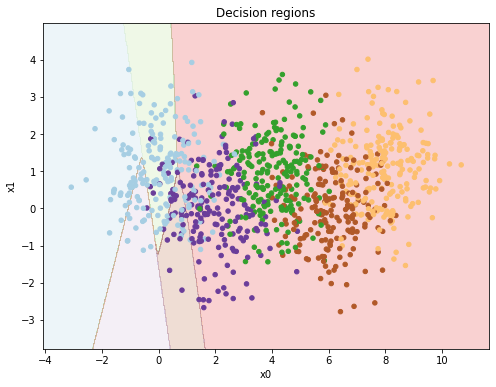

In [ ]:
mnncl = MNNClassifier(0.01,6)
mnncl.fit(X_train, t_train, 1500)

print("Bottom: Plotting the results with 0.2 eta, 3000 epochs and hidden classes. The accuracy is "+ str(cl.accuracy(X_val, t_val))+"\n")
plot_decision_regions(X_train, t_train, mnncl)

In [ ]:
def MNNTestRun(test_data):

    print("Running classifier 10 times. Listing all runs in table.\n")
    result = []
    accuracy_result = []

    for run in range(10):
        mnncl = MNNClassifier(test_data[0], test_data[2])
        mnncl.fit(X_train, t_train, test_data[1])

        run_result = [run+1, test_data[0], test_data[1],test_data[2],mnncl.accuracy(X_val, t_val)]
        result.append(run_result)
        accuracy_result.append(run_result[4])

    np_accuracy = np.array(accuracy_result)
    r_mean = round(np_accuracy.mean(), 3)
    r_std = round(np_accuracy.std(), 3)

    result = pd.DataFrame(result)
    result.columns = ["run nmb.", "eta", "epochs","hidden nodes", "accuracy"]

    print("Mean of 10 runs is " + str(r_mean)+", standart deviation is "+str(r_std)+".")
    return result

MNNTestRun([0.01, 1500, 6])

Running classifier 10 times. Listing all runs in table.

Mean of 10 runs is 0.763, standart deviation is 0.014.


,run nmb.,eta,epochs,hidden nodes,accuracy
0,1,0.01,1500,6,0.768
1,2,0.01,1500,6,0.766
2,3,0.01,1500,6,0.762
3,4,0.01,1500,6,0.756
4,5,0.01,1500,6,0.760
5,6,0.01,1500,6,0.770
6,7,0.01,1500,6,0.768
7,8,0.01,1500,6,0.726
8,9,0.01,1500,6,0.766
9,10,0.01,1500,6,0.784


### Binary class
#### code is my own

In [ ]:
def MNNTestRun_Binary(test_data):

    print("Testing different parameters to find the the highest accuracy.\nList in table from best to worst accuracy.\n")
    result = []

    for test in test_data:
        mnncl = MNNClassifier(test[0], test[2])
        mnncl.fit(X_train, t2_train, test[1])

        run_result = [test[0], test[1],test[2],mnncl.accuracy(X_val, t2_val)]
        result.append(run_result)

    result = sorted(result, key=itemgetter(3), reverse=True)
    result = pd.DataFrame(result)
    result.columns = ["eta", "epochs","hidden nodes", "accuracy"]

    return result

MNNTestRun_Binary([[0.2, 500, 6], [0.2, 1500, 6], [0.2, 3000, 6],[0.2, 1500, 7], [0.2, 1500, 9], [0.2, 1500, 12],
            [0.1, 500, 6], [0.1, 1500, 6], [0.1, 3000, 6],[0.1, 1500, 7], [0.1, 1500, 9], [0.1, 1500, 12],
            [0.01, 500, 6], [0.01, 1500, 6], [0.01, 3000, 6],[0.01, 1500, 7], [0.01, 1500, 9], [0.01, 1500, 12]])

Testing different parameters to find the the highest accuracy.
List in table from best to worst accuracy.



ValueError: ValueError: operands could not be broadcast together with shapes (1000,5) (1000,2) 

In [ ]:
def MNNDataRun_Binary(test_data):

    print("Running classifier 10 times. Listing all runs in table.\n")
    result = []
    accuracy_result = []

    for run in range(10):
        mnncl = MNNClassifier(test_data[0], test_data[2])
        mnncl.fit(X_train, t2_train, test_data[1])

        run_result = [run+1, test_data[0], test_data[1],test_data[2],mnncl.accuracy(X_val, t2_val)]
        result.append(run_result)
        accuracy_result.append(run_result[4])

    np_accuracy = np.array(accuracy_result)
    r_mean = round(np_accuracy.mean(), 3)
    r_std = round(np_accuracy.std(), 3)

    result = pd.DataFrame(result)
    result.columns = ["run nmb.", "eta", "epochs","hidden nodes", "accuracy"]

    print("Mean of 10 runs is " + str(r_mean)+", standart deviation is "+str(r_std)+".")
    return result

MNNDataRun_Binary([0.01, 1500, 6])

Running classifier 10 times. Listing all runs in table.



ValueError: ValueError: operands could not be broadcast together with shapes (1000,5) (1000,2) 

### Comment

**Training the classifier on X_train and t2_train does not work for reason I cannot explain. I tried several solutions but cannot find the error.**

The code I would use is shown above. Below the MNN Classifier with X_train, t2_train dataset is not used and not part of the comparison.

# Part III: Final testing
We can now perform a final testing on the held-out test set.

## Binary task (X, t2)

## Multi-class task (X, t)

#### Code Is My Own

In [ ]:
def final_test (linreg_data, logreg_data,mnn_data):

    lincl = NumpyLinRegClass()
    lincl.fit(X_train, t2_train, linreg_data[0], linreg_data[1])

    lincl_result_train = lincl.accuracy(X_train, t2_train)
    lincl_result_val = lincl.accuracy(X_val, t2_val)
    lincl_result_test = lincl.accuracy(X_test, t2_test)

    logcl = NumpyLogReg()
    logcl.fit(X_train, t2_train, logreg_data[0], logreg_data[1], 0)

    logcl_result_train = logcl.accuracy(X_train, t2_train)
    logcl_result_val = logcl.accuracy(X_val, t2_val)
    logcl_result_test = logcl.accuracy(X_test, t2_test)


    #neural network with X_train, t2_train marked out because it does not work!
    #mnncl = MNNClassifier(mnn_data[0], mnn_data[2])
    #mnncl.fit(X_train, t_train, mnn_data[1])

    #mnncl_result_train = mnncl.accuracy(X_train, t2_train)
    #mnncl_result_val = mnncl.accuracy(X_val, t2_val)
    #mnncl_result_test = mnncl.accuracy(X_test, t2_test)

    lincl_result = [lincl_result_train,lincl_result_val,lincl_result_test]
    logcl_result = [logcl_result_train,logcl_result_val,logcl_result_test]

    result = pd.DataFrame([lincl_result, logcl_result])
    result.columns = ["training accuracy", "validation accuracy", "test accuracy"]
    result.index = ["linear regression", "logistic regression"]

    display(result)

final_test([0.001, 500],[0.1, 1500],[0,0,0])

,training accuracy,validation accuracy,test accuracy
linear regression,0.513,0.586,0.554
logistic regression,0.706,0.672,0.724


In [ ]:
def final_test (multi_data,mnn_data):

    mutlicl = OneVsRest_Multi()
    mutlicl.fit(X_train, t_train, multi_data[0], multi_data[1], 5)

    multicl_result_train = mutlicl.accuracy(X_train, t_train)
    multicl_result_val = mutlicl.accuracy(X_val, t_val)
    multicl_result_test = mutlicl.accuracy(X_test, t_test)

    mnncl = MNNClassifier(mnn_data[0], mnn_data[2])
    mnncl.fit(X_train, t_train, mnn_data[1])

    mnncl_result_train = mnncl.accuracy(X_train, t_train)
    mnncl_result_val = mnncl.accuracy(X_val, t_val)
    mnncl_result_test = mnncl.accuracy(X_test, t_test)

    multicl_result = [multicl_result_train,multicl_result_val,multicl_result_test]
    logcl_result = [mnncl_result_train,mnncl_result_val,mnncl_result_test]

    result = pd.DataFrame([multicl_result, logcl_result])
    result.columns = ["training accuracy", "validation accuracy", "test accuracy"]
    result.index = ["one vs. rest", "multi neural network"]

    display(result)

final_test([0.2, 3000],[0.01, 1500, 6])

,training accuracy,validation accuracy,test accuracy
one vs. rest,0.749,0.754,0.774
multi neural network,0.759,0.740,0.754


### Comment

Because of the error in using X_train, t2_train there is no 3x3 table, since the MNN classifier does not work with these data sets.

There is a small but no major difference visible between training, validation and test accuracy (interesting is the fact that is does not always get better from training to variation and variation to testing). This is the case both for liner/logistic regression and one vs. all/Neural Network Classifier.

Overall the one vs. rest algorithm has the best accuracy. But since there is one missing, a final examination cannot be made.